<a href="https://colab.research.google.com/github/Susovan88/Machine_Learning/blob/main/Linear%20Regression/Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression Analysis**
**We assume the real(True Propulation) relationship between
𝑋and
𝑌**

y=3x−8+ϵ

Slope
m=3

Intercept
b=−8

ϵ∼N(0,5
) = noise from a normal distribution with mean 0 and std 5

This is the red line in your plot → it’s the "true" relationship in the population.

In sample data -> Because of noise, the sample points don’t perfectly lie on the population line.

 coef_ -> 3.4103902708363623 , intercept_ ->-9.365142885368215


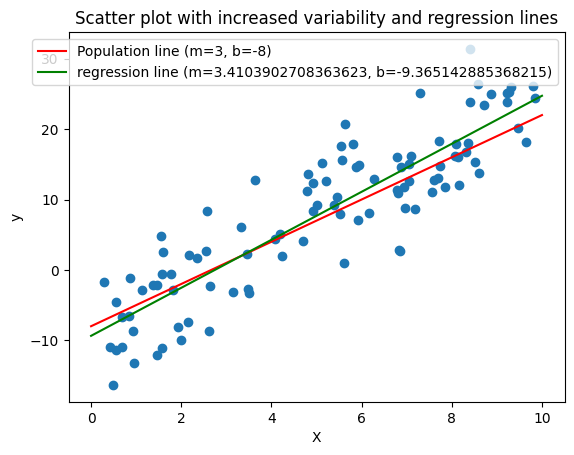

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# sample data
x=10*np.random.rand(100)
y=3*x-8+np.random.randn(100)*5

x=x.reshape(100,1)
lr=LinearRegression()
lr.fit(x,y)

print(f" coef_ -> {lr.coef_[0]} , intercept_ ->{lr.intercept_}")

y_pred=lr.predict(x)

plt.scatter(x,y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Scatter plot with increased variability and regression lines")

## True propulation line
x_pop=np.linspace(0,10,1000)
y_pop=3*x_pop-8
plt.plot(x_pop,y_pop, color="red",label="Population line (m=3, b=-8)")

## estimated regression line from sample data
y_estimate=lr.predict(x_pop.reshape(1000,1))
plt.plot(x_pop,y_estimate, color="green",label=f"regression line (m={lr.coef_[0]}, b={lr.intercept_})")

plt.legend()
plt.show()

# **🔑 Key learning:**

The population line is fixed (truth).

The sample regression line changes depending on which random sample you draw.

With more and more data, the estimated regression line (green) will get closer to the true population line (red).

# **What is statsmodels?**

statsmodels is a Python library for statistical modeling and hypothesis testing.

It’s like scikit-learn, but instead of focusing mainly on prediction, it focuses more on statistics and inference.

You can use it for:

Linear regression

Logistic regression

Time series analysis

ANOVA, ARIMA, etc.

Hypothesis testing (t-test, F-test, chi-square test, etc.)

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
url = "https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv"
data = pd.read_csv(url,index_col=0)

x=data[['TV','Radio','Newspaper']]
y=data['Sales']

x=sm.add_constant(x)  ## -> Adds a column of 1s named const to x. This lets OLS estimate the intercept
#Important: statsmodels does not add an intercept automatically (unlike sklearn), so you must add it when you want an intercept.
model=sm.OLS(y,x).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 14 Sep 2025   Prob (F-statistic):           1.58e-96
Time:                        05:20:03   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [ ]:
y

,Sales
1,22.1
2,10.4
3,9.3
4,18.5
5,12.9
...,...
196,7.6
197,9.7
198,12.8
199,25.5
